In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define studied plots

In [2]:
monitored_runs = ["../results/BiLSTMConfig/20180308_175823-65f4/",
                  "../results/LSTMConfig/20180313_160911-82ec/",
                  "../results/LSTMConfig/20180313_165601-95fa/",
                  "../results/BiLSTMConfig/20180313_165245-1b21/",
                  "../results/BiLSTMConfig/20180313_172053-d7c2/",
                  "../results/BiLSTMConfig/20180313_172716-30fd/",
                  "../results/BiLSTMConfig/20180313_172716-30fd/",
                  "../results/StackedLSTMConfig/20180313_174436-9478/"
                 ]

labels = ["base Bi-LSTM",
          "LSTM, extra layer = 20, learning rate .005",
          "LSTM, extra layer = 50, learning rate .005",
          "Bi-LSTM, extra layer = 50, learning rate .005",
          "Bi-LSTM, extra layer = 100, learning rate .005",
          "Bi-LSTM, extra layer = 200, learning rate .005",
          "Stacked-LSTM, layers = [50, 17], learning rate .005"]

In [3]:
class RunResult(object):
    def load_los_file(self, filename):
        values = []
        with open(self.runpath + filename, 'r') as f:
            for l in f:
                values.append(float(l.strip()))
        return values
    
    def filenames(self):
        return ["dev_f1.los", "dev_losses.los", "dev_precision.los", "dev_recall.los",
                "train_f1.los", "train_losses.los", "train_precision.los", "train_recall.los"]
    
    def __init__(self, runpath):
        self.runpath = runpath
        self.results_dic = {}
        for filename in self.filenames():
            self.results_dic[filename] = self.load_los_file(filename)
        with open(self.runpath + "params.json") as f:
            self.params = json.load(f)

In [4]:
all_results = [RunResult(monitored_run) for monitored_run in monitored_runs]

In [5]:
all_results[-1].params

{'adaptative_lr': False,
 'batch_size': 128,
 'data_train': 'data/ner_dataset.csv',
 'ee': False,
 'extra_layer': False,
 'hidden_size': 50,
 'l2': None,
 'learning_rate': 0.005,
 'model': 'stacked_lstm',
 'n_epochs': 30,
 'no_result': False,
 'other_layer_size': 20,
 'tiny': False,
 'train_fraction': 0.9,
 'vectors': 'data/en-cw.txt'}

# Plots

### Train F1 evolution per config

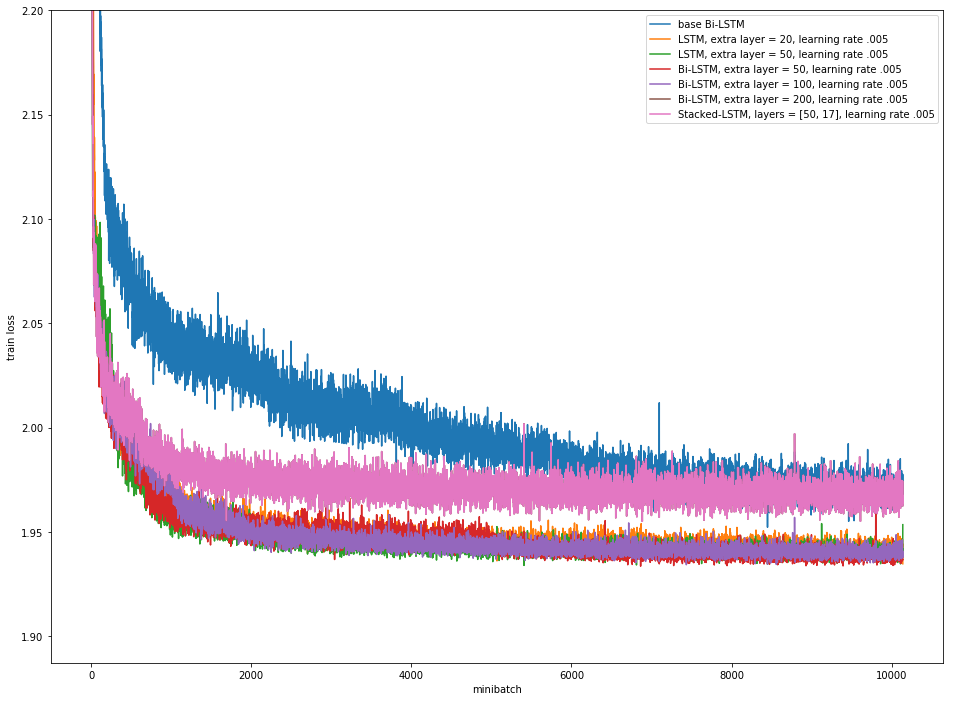

In [7]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("minibatch")
plt.ylabel("train loss")
plt.ylim(top=2.2)
plt.legend()
    
plt.show()

### Train F1 evolution per config

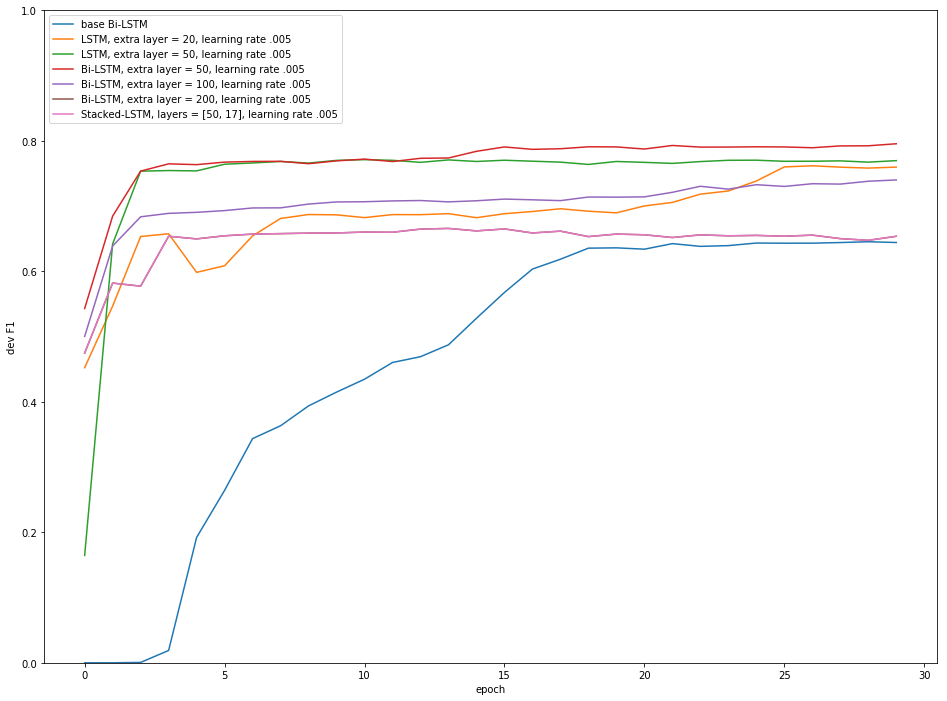

In [11]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["dev_f1.los"], label = label)

plt.xlabel("epoch")
plt.ylabel("dev F1")
plt.legend(loc="upper left")
    
plt.ylim((0, 1))
plt.show()